In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.set_option('display.max_columns', 21)

In [2]:
data = pd.read_csv('teleom_customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


data showing no missing values. Let's confirm.

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 Yes there is no null values

We don't need CustomerID. We will drop it.

In [6]:
data.drop('customerID', axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


total charges have float values but it's dtype is object let's change it to float.

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
data['TotalCharges'].isnull().sum()

11

In [10]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### We have more categories features than numerical features
Let's perform data exploratory analysis.

## Data Exploratory Analysis
We will answer following questions.
1. What is the ratio of churn and non churn customers.
2. Gender Ratio in churn customers
3. What is churn rate in aged and non aged customers?
4. How longer customer stayed with company wrt monthly rate?
5. Number of customers of each duration
6. Total payments by customers
7. What is the monthly rate customers paying with internet services?
8. Number of customers with different activated sevices.
9. Let's find some services effects on billing
10. Total Customers who subscribed Streaming services

## 1. What is the ratio of churn and non churn customers.

In [11]:
churn_data = pd.DataFrame(data.groupby('Churn')['Churn'].count())
churn_data.columns=['Customers']
churn_data['Percentage'] = round((churn_data['Customers']/sum(churn_data['Customers']))*100, 2)

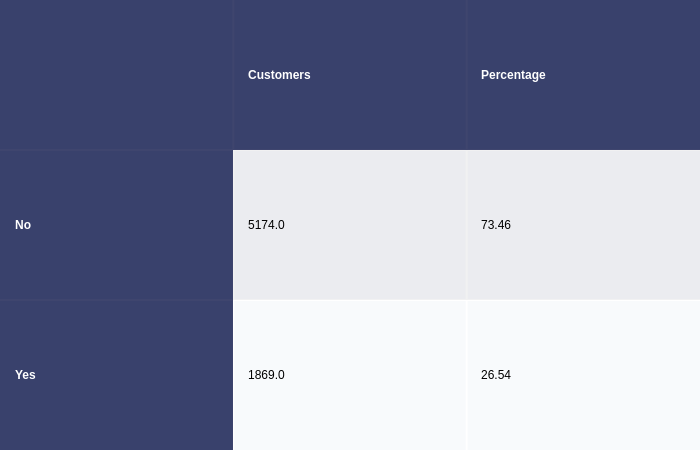

In [12]:
fig = ff.create_table(churn_data, index=True)
fig.show('png')

So 73% customers didn't churn but 26% did.<br>
let's check gender ratio.

## 2. Gender Ratio in churn customers

In [13]:
gen_data = pd.DataFrame(data.groupby(['gender', 'Churn'])['Churn'].count())
gen_data.columns = ['Customers']
gen_data.reset_index(inplace=True)
gen_data['Percentage'] = round((gen_data['Customers']/sum(gen_data['Customers'])*100),2)
gen_data

,gender,Churn,Customers,Percentage
0,Female,No,2549,36.19
1,Female,Yes,939,13.33
2,Male,No,2625,37.27
3,Male,Yes,930,13.20


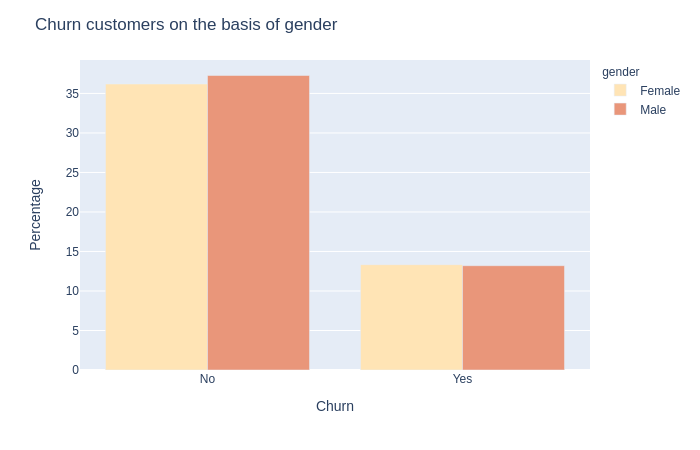

In [14]:
fig = px.bar(gen_data, x='Churn', y='Percentage', color='gender', barmode='group',
             color_discrete_sequence=['moccasin', 'darksalmon'])
fig.update_layout(title='Churn customers on the basis of gender')
fig.show('png')

Gender wise we have almost equal ratio of churn and non churn customers.

## 3. What is churn rate in aged and non aged customers?

In [15]:
sr_data = pd.DataFrame(data.loc[data['SeniorCitizen'] == 1].groupby('Churn')['SeniorCitizen'].count())
sr_data.columns = ['Customers']
sr_data.reset_index(inplace = True)
sr_data['Citizen'] = 'Senior'
nsr_data = pd.DataFrame(data.loc[data['SeniorCitizen'] == 0].groupby('Churn')['SeniorCitizen'].count())
nsr_data.columns = ['Customers']
nsr_data.reset_index(inplace = True)
nsr_data['Citizen'] = 'Not Senior'
citizen_data=pd.concat([sr_data, nsr_data], axis=0)
citizen_data

,Churn,Customers,Citizen
0,No,666,Senior
1,Yes,476,Senior
0,No,4508,Not Senior
1,Yes,1393,Not Senior


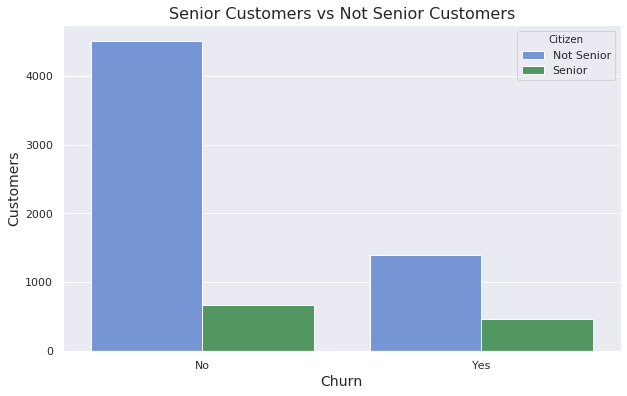

In [17]:
plt.figure(figsize=[10,6])
sns.barplot(data=citizen_data, x='Churn', y='Customers', hue='Citizen', 
            hue_order=['Not Senior', 'Senior'], palette=sns.diverging_palette(255, 133, l=60, n=2, center="dark"))
plt.title('Senior Customers vs Not Senior Customers', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Customers', fontsize=14)
plt.show()

Company record showing that there are less Senior citizens. 666 are the total senior customers who are staying with company but 476 change their network.<br>
Churning rate is low as compare to not churn rate.

## 4. How longer customer stayed with company wrt monthly rate?

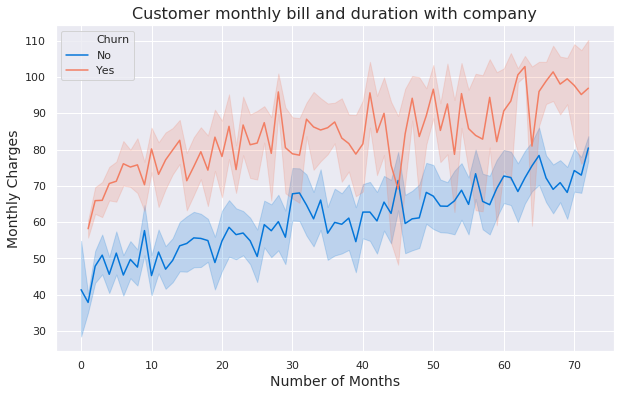

In [18]:
plt.figure(figsize=[10,6])
sns.lineplot(data=data, x='tenure', y='MonthlyCharges', hue='Churn', 
             palette=sns.color_palette(['#0476D9', '#F27E63']))
plt.title('Customer monthly bill and duration with company', fontsize=16)
plt.xlabel('Number of Months', fontsize=14)
plt.ylabel('Monthly Charges', fontsize=14)
plt.show()

Churn customers have high rates as compared to no churn. This one factor from different factors may be the cause of customers leaving the company. They were charge higher. <br>

## 5. Number of customers of each duration

In [19]:
customers = pd.DataFrame(data.groupby(['tenure', 'Churn'])['Churn'].count())
customers.columns=['Customers']
customers.reset_index(inplace=True)
customers

,tenure,Churn,Customers
0,0,No,11
1,1,No,233
2,1,Yes,380
3,2,No,115
4,2,Yes,123
...,...,...,...
140,70,Yes,11
141,71,No,164
142,71,Yes,6
143,72,No,356


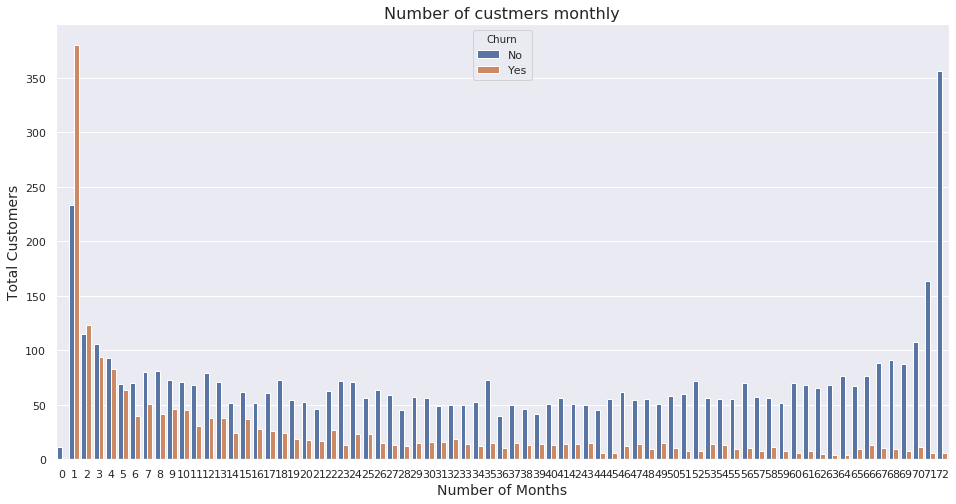

In [20]:
plt.figure(figsize=[16,8])
sns.barplot(data=customers, x='tenure', y='Customers', hue='Churn')
plt.title('Number of custmers monthly', fontsize=16)
plt.xlabel('Number of Months', fontsize=14)
plt.ylabel('Total Customers', fontsize=14)
plt.show()

So result showing we have lower churn customers as compared to non churn. It's mean thy were charged or they have extra services activated.<br>
Most of the customers came for 1 month to try services but didn't satisfied.

## 6. Total payments by customers

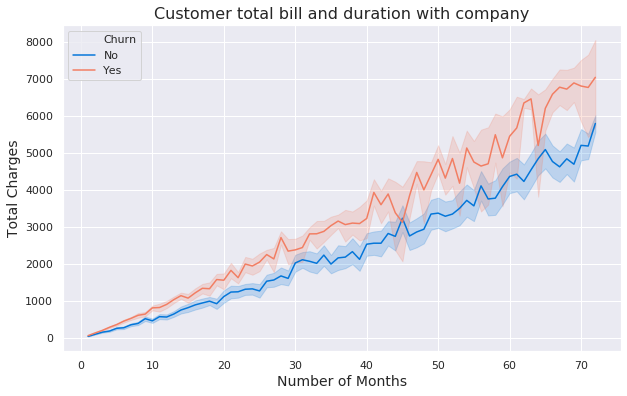

In [21]:
plt.figure(figsize=[10,6])
sns.lineplot(data=data, x='tenure', y='TotalCharges', hue='Churn', 
             palette=sns.color_palette(['#0476D9', '#F27E63']))
plt.title('Customer total bill and duration with company', fontsize=16)
plt.xlabel('Number of Months', fontsize=14)
plt.ylabel('Total Charges', fontsize=14)
plt.show()

Getting the same situation here. Payments increasing with time but churn customer paid more.

## 7. What is the monthly rate customers paying with internet services?

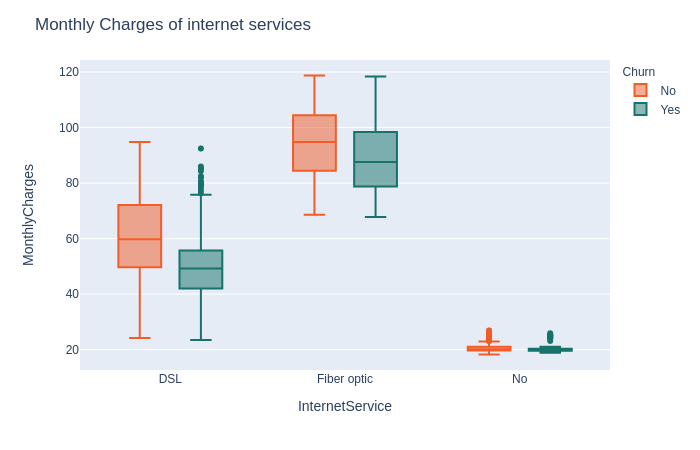

In [22]:
fig = px.box(data_frame=data, x= 'InternetService', y='MonthlyCharges', color='Churn',
            color_discrete_sequence=['#F25D27', '#17736A'])
fig.update_layout(title='Monthly Charges of internet services')
fig.show('png')

#### Yes internet services playing major role in pricing but not churning the customers.<br>
1. Customers bill without internet services is very low that may other services bill like calling etc.<br>
2. DSL services charging average rates. One thing we can those that customers who left company actually they were paying rates as compared to others. So we can say that internet charges are not the issue for customers churning.<br>
3. Fiber optic charging the highest these charges make sense because fiber provides quality service. Both customers paying almost paying the same rates.

## 8. Number of customers with different activated sevices.

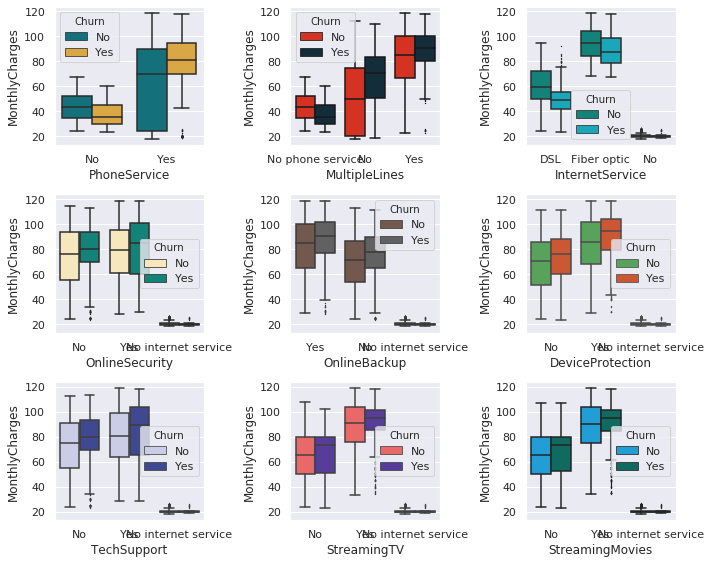

In [23]:
fig = plt.figure(figsize=[10,8])

plt.subplot(3, 3, 1)
sns.boxplot(data=data, x='PhoneService', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#037F8C', '#F2AE2E']))

plt.subplot(3, 3, 2)
sns.boxplot(data=data, x='MultipleLines', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#F21905', '#0D3140']))

plt.subplot(3, 3, 3)
sns.boxplot(data=data, x='InternetService', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#009688', '#00BCD4']))

plt.subplot(3, 3, 4)
sns.boxplot(data=data, x='OnlineSecurity', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#FFECB3', '#009688']))

plt.subplot(3, 3, 5)
sns.boxplot(data=data, x='OnlineBackup', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#795548', '#616161']))

plt.subplot(3, 3, 6)
sns.boxplot(data=data, x='DeviceProtection', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#4CAF50', '#E64A19']))

plt.subplot(3, 3, 7)
sns.boxplot(data=data, x='TechSupport', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#C5CAE9', '#303F9F']))

plt.subplot(3, 3, 8)
sns.boxplot(data=data, x='StreamingTV', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#FF5252', '#512DA8']))

plt.subplot(3, 3, 9)
sns.boxplot(data=data, x='StreamingMovies', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#03A9F4', '#00796B']))

fig.tight_layout()
plt.show()

In all services Churn customers paid higher except Internet services. Looks like company only provide relief in internet services.

## 9. Let's find some services effects on billing

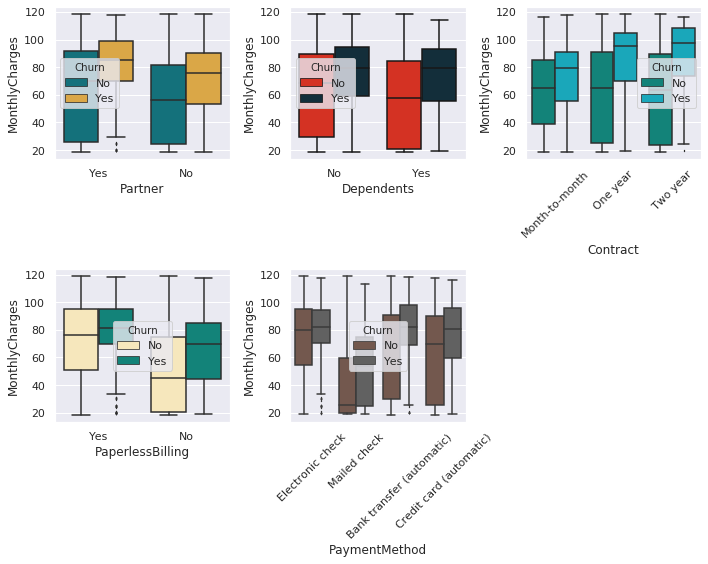

In [24]:
fig = plt.figure(figsize=[10,8])

plt.subplot(2, 3, 1)
sns.boxplot(data=data, x='Partner', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#037F8C', '#F2AE2E']))

plt.subplot(2, 3, 2)
sns.boxplot(data=data, x='Dependents', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#F21905', '#0D3140']))

plt.subplot(2, 3, 3)
sns.boxplot(data=data, x='Contract', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#009688', '#00BCD4']))
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.boxplot(data=data, x='PaperlessBilling', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#FFECB3', '#009688']))

plt.subplot(2, 3, 5)
sns.boxplot(data=data, x='PaymentMethod', y='MonthlyCharges', hue='Churn', 
            fliersize=0.5, palette=sns.color_palette(['#795548', '#616161']))
plt.xticks(rotation=45)

fig.tight_layout()
plt.show()

As expected same result. Because of high prices churned customers making sense.
#### We don't have information about price of each services so i can't find which service cost high and insides why they cost high.

## 10. Total Customers who subscribed Streaming services

In [25]:
stream_tv = pd.DataFrame(data.loc[(data['StreamingTV'] == data['StreamingMovies']) & (data['StreamingTV'] == 'Yes')]['StreamingTV'].value_counts())
stream_tv.reset_index(inplace=True)
stream_tv.columns = ['Subscribed', 'Customers']
stream_tv['Service'] = 'StreamingTV & StreamingMovies'

stream_tv1 = pd.DataFrame(data.loc[(data['StreamingTV'] == data['StreamingMovies']) & (data['StreamingTV'] == 'No')]['StreamingTV'].value_counts())
stream_tv1.reset_index(inplace=True)
stream_tv1.columns = ['Subscribed', 'Customers']
stream_tv1['Service'] = 'StreamingTV & StreamingMovies'


stream_tv2 = pd.DataFrame(data.loc[(data['StreamingTV'] != data['StreamingMovies']) & (data['StreamingTV'] == 'No')]['StreamingTV'].value_counts())
stream_tv2.reset_index(inplace=True)
stream_tv2.columns = ['Subscribed', 'Customers']
stream_tv2['Service'] = 'StreamingTV'


stream_tv3 = pd.DataFrame(data.loc[(data['StreamingTV'] != data['StreamingMovies']) & (data['StreamingTV'] == 'Yes')]['StreamingTV'].value_counts())
stream_tv3.reset_index(inplace=True)
stream_tv3.columns = ['Subscribed', 'Customers']
stream_tv3['Service'] = 'StreamingTV'


stream_tv4 = pd.DataFrame(data.loc[(data['StreamingTV'] != data['StreamingMovies']) & (data['StreamingMovies'] == 'No')]['StreamingMovies'].value_counts())
stream_tv4.reset_index(inplace=True)
stream_tv4.columns = ['Subscribed', 'Customers']
stream_tv4['Service'] = 'StreamingMovies'


stream_tv5 = pd.DataFrame(data.loc[(data['StreamingTV'] != data['StreamingMovies']) & (data['StreamingMovies'] == 'Yes')]['StreamingMovies'].value_counts())
stream_tv5.reset_index(inplace=True)
stream_tv5.columns = ['Subscribed', 'Customers']
stream_tv5['Service'] = 'StreamingMovies'

streaming_services = pd.concat([stream_tv, stream_tv1, stream_tv2, stream_tv3, 
                                stream_tv4, stream_tv5], axis=0)
streaming_services

,Subscribed,Customers,Service
0,Yes,1940,StreamingTV & StreamingMovies
0,No,2018,StreamingTV & StreamingMovies
0,No,792,StreamingTV
0,Yes,767,StreamingTV
0,No,767,StreamingMovies
0,Yes,792,StreamingMovies


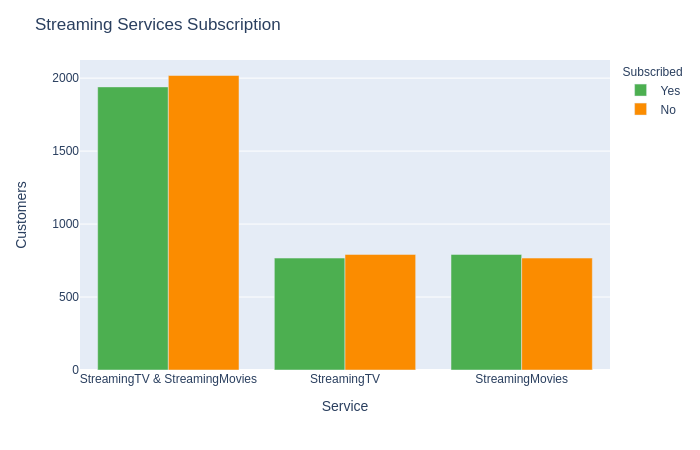

In [26]:
fig = px.bar(streaming_services, x='Service', y='Customers', color='Subscribed', barmode='group',
             color_discrete_sequence=['#4caf50', '#fb8c00'])
fig.update_layout(title='Streaming Services Subscription')
fig.show('png')

#### Final Thoughts:
Main reason we found from data to churn is price. The customers who churn were paying high for the same services. We have to adjust prices from churning customers.